In [167]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import *
from scipy.integrate import simps
from numpy import trapz
from sklearn import metrics
from scipy import stats


# Método para calcular la masa de una galaxia teniendo la curva de rotación


Con la curva de rotación a disposición, se utiliza un modelo para calcular la masa contenida hasta un radio $r$.

Tomamos la masa en función del radio, es decir, $M=M(r)$.


La densidad de masa $\rho = \dfrac{dM}{dV}$, la masa contenida hasta un radio $r_t$ está dada por

$M_t=\int_{0}^{r_t} \rho(r)4\pi r^2 dr$

dado que $dV=4\pi r^2 dr$. Del teorema del virial

$\hspace{7.0cm} v^2(r)=\dfrac{GM(r)}{r}$

Y por regla de la cadena $\dfrac{dM(r)}{dV}=\dfrac{dM(r)}{dr} \dfrac{dr}{dV}$

$\hspace{7.0cm} \rho(r)=\dfrac{v^2(r)}{4\pi r^2 G}$

Teniendo estas ecuaciones, obtenemos lo siguiente

$\hspace{7.0cm} M_t=\int_{0}^{r_t} \dfrac{v^2(r)}{G} dr=\dfrac{1}{G}\int_{0}^{r_t}v^2(r)dr$

Por lo tanto la masa es el área bajo la curva de $v^2(r)$ vs $r$

# Velocidad orbital




$V_{orbital}(r)=\sqrt{\dfrac{GM}{r}}$


In [51]:
def v(r,M): #velocidad órbital
    G= 6.67408*10**(-20) #km^3/kg.s^2
    return np.sqrt((G*M)/(r*3.086*10**(16)))

# Galaxia de Andrómeda (M31)

In [52]:
Vandr=[235.5,242.9,251.1,262.0,258.9,255.1,251.8,252.1,251.0,245.5,232.8,232.0,235.7,
        229.3,227.6,260,225.7,227.5,227.4,225.6,224.4,222.3,222.1,224.9,228.1,231.1,230.4,226.8] #km/s

Randr=np.array([5.68,6.81,7.95,9.08,10.22,11.32,12.49,13.62,14.76,15.89,17.03,
                18.16,19.30,20.43,21.45,22.47,23.50,24.52,25.54,26.56,
               27.58,28.60,29.62,30.65,31.67,32.69,33.71,34.73])#kpc
Mandr= 1.989*10**(41) #kg


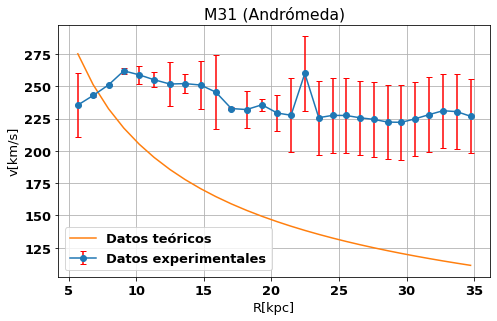

In [53]:
error= np.array([25,0.8,0.7,2.1,6.9,5.7,17.1,7.4,18.6,28.8,1,14.2,4.6,13.8,28.8,28.8,28.8,
               28.8,28.8,28.8,28.8,28.8,28.8,28.8,28.8,28.8,28.8,28.8]) # #desviación estándar de la velocidad

font = {'weight' : 'bold', 'size'  :13}

fig, ax=plt.subplots()
fig.subplots_adjust( left=100, right=101, top=1)

ax.errorbar(Randr, Vandr, yerr=error,marker="o",
           ecolor="Red",
           capsize=3,
           label= 'Datos experimentales')
ax.plot(Randr, v(Randr,Mandr), label= 'Datos teóricos')
ax.grid()
ax.set(title='M31 (Andrómeda)' , xlabel='R[kpc]', ylabel='v[km/s]')
plt.rc('font',**font)
plt.legend()
plt.show()

In [ ]:
font = {'weight' : 'bold', 'size'  :13}

fig, ax=plt.subplots()
fig.subplots_adjust( left=100, right=101, top=1)

ax.errorbar(Randr, Vandr, yerr=error,marker="o",
           ecolor="Red",
           capsize=3,
           label= 'Datos experimentales')
ax.plot(Randr, v(Randr,Mandr), label= 'Datos teóricos')
ax.grid()
ax.set(title='M31 (Andrómeda)' , xlabel='R[kpc]', ylabel='v[km/s]')
plt.rc('font',**font)
plt.legend()
plt.show()

In [54]:
Vandr2=np.array(Vandr)**2 # velocidad orbital al cuadrado

MasaAndromeda = simps(Vandr2, x=Randr*3.08*10**(16))*1/(6.67408*10**(-20)) #Cálculo del área bajo la curva 

print("La masa de la galaxia de Andrómeda es, en kilogramos, de:" ,MasaAndromeda)

La masa de la galaxia de Andrómeda es, en kilogramos, de: 7.606482349903794e+41


# Resultado

La masa bariónica (BM) de M31 es de $1.989*10^{41}kg$ y la masa total es de $7.606*10^{41}$, teniendo como resultado un total de materia oscura de $15.617*10^{41}$, por lo tanto

$\hspace{10cm}Porcentaje_{DM} = 73.850\% $

$\hspace{10cm}Porcentaje_{BM} = 26.150\% $




# Galaxia Vía Láctea

In [170]:
Vlac = np.array([144.9,147.4,150.4,153.8,158.9,167.4,180.1,196.6,213.6,227.8,237.9,244.4,248.2,250.2,
                251,250.7,249.7,248,245.9,243.2,239.8,235.8,231.7,227.8,224.5,221.7,219.1,216.8,
                214.7,212.7,210.9,209.5,208.5,208.2,208.2,210.7,213.4,217.2,222,226.6,229.5,231.6,
                234.1,237.2,239.5,240.3,239,236.7,234.5,234.2,237.1,242.8,248.5,249.7,246.2,243.3,
                243.9,245.6,243.7,237.3,229.6,222.5,215,207.1,200.3,194.7,189.8,186.2,184.7,183.9,
                181.4,175.5,167.7]) #km/s
Rlac = np.array([0.100,0.110,0.121,0.133,0.146,0.161,0.177,0.195,0.214,0.236,0.259,0.285,0.314,0.245,0.380,
                0.418,0.459,0.505,0.556,0.612,0.673,0.740,0.814,0.895,0.985,1.083,1.192,1.311,1.442,1.586,
                1.745,1.919,2.111,2.323,2.555,2.810,3.091,3.400,3.740,4.114,4.526,4.979,5.476, 6.024,
                6.626,7.289,8.018,8.820,9.702,10.672,11.739,12.913,14.204,15.625,17.187,18.906,20.797,
                22.876,25.164,27.680,30.448,33.493,36.842,40.527,44.579,49.037,53.941,59.335,65.268,
                71.795,78.975,86.872,95.560]) #kpc
RlacT = np.array([8.018,8.820,9.702,10.672,11.739,12.913,14.204,15.625,17.187,18.906,20.797,
                22.876,25.164,27.680,30.448,33.493,36.842,40.527,44.579,49.037,53.941,59.335,65.268,
                71.795,78.975,86.872,95.560]) #kpc

ErrV= np.array([3.7,4.2,4.8,6.1,10.3,16.1,22.4,27.1,26.9,22.7,17,11.8,7.6,4.7,2.9,2.1,2.3,2.9,3.7,4.6,5.7,
               6.4,6.5,6,5.2,4.5,4,3.7,3.4,3.1,2.8,2.3,1.8,1.6,2.2,3.6,4.8,5.9,6.6,5.7,4.4,4.3, 5.3, 5.7,5,
               4.1,4.4,5.4,6,7.1,9.8,12.4,13.3,14.8,17.4,18.3,17.5,15.6,15.2,16.1,15.5,14.1,14,13.8,17.3,
               11.9,11.3,10.4,9.6,9.3,11,14.6,16.3]) #desviación estándar de la velocidad
Mlac = 3.315*10**(41) #kg

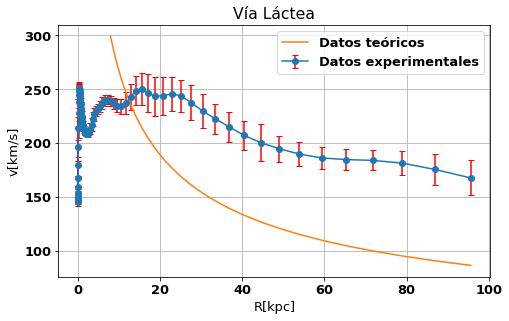

In [56]:
font = {'weight' : 'bold', 'size'  :13}

fig, ax=plt.subplots()
fig.subplots_adjust( left=100, right=101, top=1)

ax.errorbar(Rlac, Vlac, yerr=ErrV,marker="o",
           ecolor="Red",
           capsize=3,
           label= 'Datos experimentales')
ax.plot(RlacT, v(RlacT,Mlac), label= 'Datos teóricos')
ax.grid()
ax.set(title='Vía Láctea' , xlabel='R[kpc]', ylabel='v[km/s]')
plt.rc('font',**font)
plt.legend()
plt.show()

In [140]:


MasaViaLactea = simps(Vlac**2, x=Rlac*3.08*10**(16))*1/(6.67408*10**(-20)) #Cálculo del área bajo la curva


print(f"La masa de la galaxia de Andrómeda es, en kilogramos, de: {MasaViaLactea:}")

La masa de la galaxia de Andrómeda es, en kilogramos, de: 1.885468060517211e+42


# Resultados

Vemos que la masa bariónica (BM) de la Vía Láctea es de $3.315*10^{41}kg$ y de la curva de rotación presentada anteriormente, tenemos que el la masa total, tanto materia oscura como materia barióica, es de $1.885*10^{42}kg$, dando como resultado que la cantidad de materia oscura (DM) en la Vía Láctea es del:

$\hspace{10cm}Porcentaje_{DM} = 82.414\% $

$\hspace{10cm}Porcentaje_{BM} = 17.586\% $



# NGC 7814

Es una galaxia espiral localizada en la constelación de Pegaso

In [168]:
Vngc= np.array([250,240,230.6,230,228.1,227.9,226.9,226.1,222.8,218.6,216.2,214.2,213.9,213.9,
               213.5,213.8,213.6,214.3]) #km/s
ErrVngc= np.array([15,10,7.3,6.5,5.4,5.2,5.9,3,3.9,2.9,2.6,2.6,3.1,3.6,4.5,5.1,4.8,4.9])

Rngc= np.array([0.15,0.41,0.67,0.93,1.20,1.47,1.73,2,2.227,2.53,2.80,3.07,3.33,3.60,3.87,4.13,
              4.40,4.67])*4.25 #kpc

RngcT= np.array([1.73,2,2.227,2.53,2.80,3.07,3.33,3.60,3.87,4.13,
              4.40,4.67])*4.25 #kpc

Mngc= 1.097*10**(41)#kg


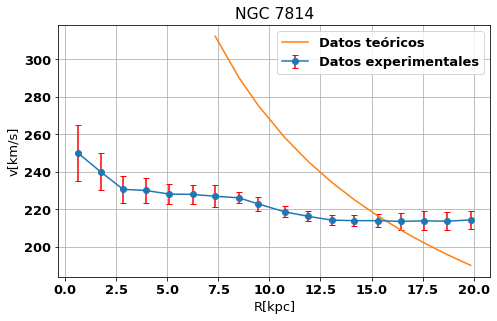

In [164]:
font = {'weight' : 'bold', 'size'  :13}

fig, ax=plt.subplots()
fig.subplots_adjust( left=100, right=101, top=1)

ax.errorbar(Rngc, Vngc, yerr=ErrVngc,marker="o",
           ecolor="Red",
           capsize=3,
           label= 'Datos experimentales')
ax.plot(RngcT, v(RngcT,Mlac), label= 'Datos teóricos')
ax.grid()
ax.set(title='NGC 7814' , xlabel='R[kpc]', ylabel='v[km/s]')
plt.rc('font',**font)
plt.legend()
plt.show()

In [166]:
MasaNGC = simps(Vngc**2, x=Rngc*3.08*10**(16))*1/(6.67408*10**(-20)) #Cálculo del área bajo la curva


print(f"La masa total de la galaxia NGC 7814 es, en kilogramos, de: {MasaNGC:}")

La masa total de la galaxia NGC 7814 es, en kilogramos, de: 4.389387938227026e+41


# Resultado

La masa total de la galaxia NGC 7814 es de $4.389*10^{41}kg$ y su masa bariónica es de $1.097*10^{41}kg$, dando como resultado una cantidad de materia oscura de $3.292*10^{41}$, por lo tanto, tenemos que:

$\hspace{10cm}Porcentaje_{DM} = 75\% $

$\hspace{10cm}Porcentaje_{BM} = 25\% $


